In [12]:
from glob import glob
from PIL import Image
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image

In [2]:
monument = glob('photos/*')

test = Image.open(monument[0])
print(test.size, test.format, test.mode)
data = np.asarray(test)
print(type(data))
print(data.shape)

(4592, 3448) MPO RGB
<class 'numpy.ndarray'>
(3448, 4592, 3)


In [3]:
#compile the data to use in PCA
mmt = np.array([])
for i in monument:
    img = Image.open(i).convert('L')
    rz_img = img.resize((460,345))
    data = np.asarray(rz_img)
    mmt = np.append(mmt,data)


In [4]:
print(np.reshape(mmt, (-1,158700)))

[[209. 208. 209. ...  83. 127. 124.]
 [211. 211. 211. ... 154. 107. 118.]
 [211. 211. 204. ... 140. 143. 140.]
 ...
 [232. 230. 231. ... 223. 216. 202.]
 [247. 245. 244. ... 198. 135. 202.]
 [190. 189. 190. ... 197. 199. 205.]]


In [78]:
#PCA down to 2 commponents
pca = PCA(n_components = 2)
principalComponents = pca.fit_transform(np.reshape(mmt, (-1,158700)))

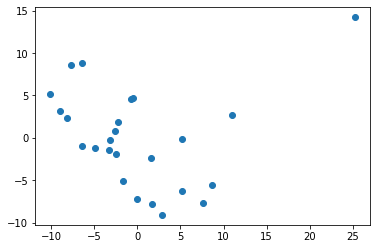

In [79]:
#plot of the 2D representation of each image
xcords = []
ycords = []
for i in principalComponents/1000:
    xcords.append(i[0])
    ycords.append(i[1])
plt.scatter(xcords, ycords)

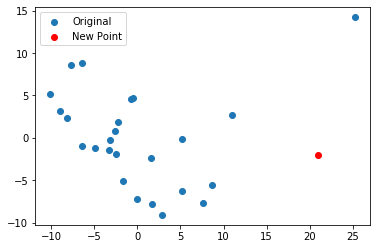

In [80]:
plt.scatter(xcords, ycords, label = 'Original')
plt.scatter(21,-2, color='r', label = "New Point")
plt.legend()
plt.show()

In [81]:
#projecting the PCA'd images back to their original size
proj = pca.inverse_transform(principalComponents)
final_img = image.reconstruct_from_patches_2d(proj.reshape(-1,345,460,25), (345,460,25))
print(final_img.shape)

(345, 460, 25)


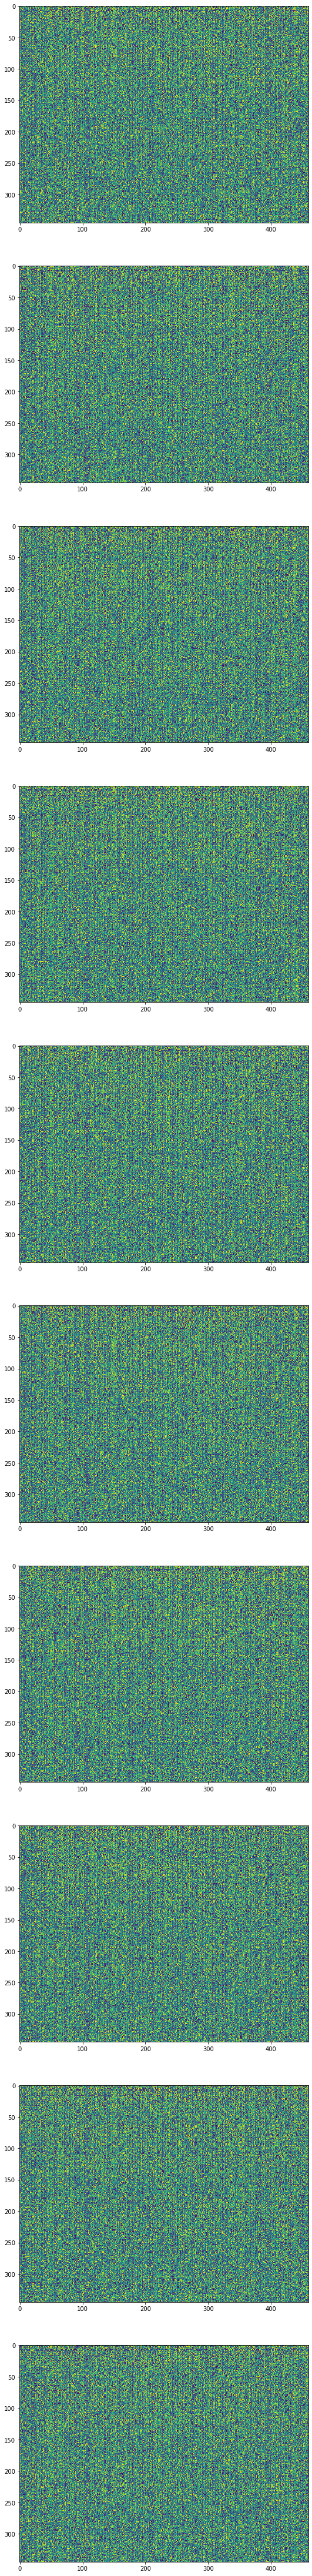

In [82]:
#reconstructing images from the first 10 PCA'd images
fig = plt.figure(figsize=(600,80))
reconstructs = []
for i in range(10):
    recon = Image.fromarray(final_img[:,:,i], "L")
    reconstructs.append(fig.add_subplot(10,1,i+1))
    plt.imshow(recon)

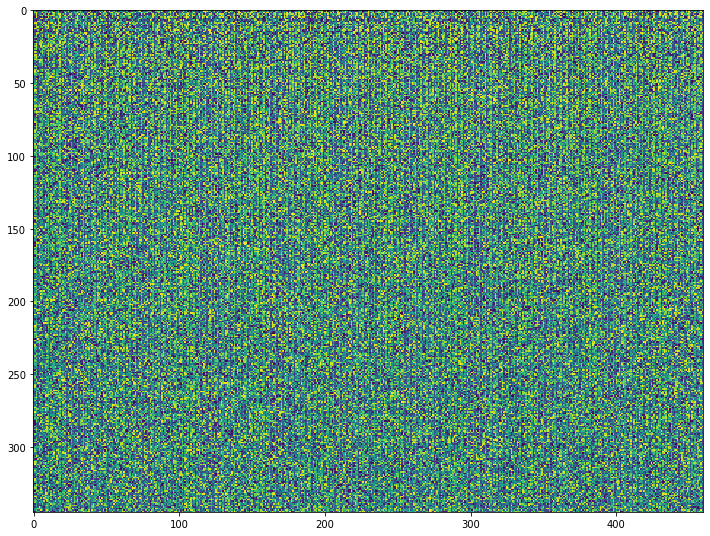

In [87]:
#reconstructing the random point
proj = pca.inverse_transform([21000,-2000])
final_img2 = image.reconstruct_from_patches_2d(proj.reshape(-1,345,460), (345,460))

Recon = Image.fromarray(final_img2, "L")
plt.figure(figsize=(12,16))
plt.imshow(Recon)